# Supervised Learning

The supervised learning is one type of machine learning, which the main goal is to learn a model from **labeled** training data that allows us to make predictions about unseen or future date. In this case, the term "supervised" refers to a set of training exemples (i.e., data inputs), where the desired output signals (i.e., labels) are already known.

Naming convention:
* Features = predictor variables = independent variables
* Target variable = dependend variable = response variable


Functions that will be used bellow:

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

## 1. Classification for Predicting Class Labels

Classification is a subcategory of supervised learning where the goal is to predict the categorical class labels of new instances, based on past observations. Those class labels are **discrete** , unordered values that can be understood as the group memberships of the instances.

As an example of a supervised learning algorithm, we will use the **k-nearest neighbor (KNN)** classifier, which is a typical **lazy learner**. This means that it doesn't learn a discriminative function from the training data but memorized the training dataset instead.

**KNN** belongs to a subcategory of **nonparametric** models that are described as **instanced-based learning**. Models based on instanced-based learning are characterized by memorizing the training dataset, and lazy learning is a particular case of instanced-based learning that is associated with no cost during the learning process. The **KNN** algorithm itself is relatively straightforward and can be summarized by the following steps:
* 1. Choose the number of *k* and a distance metric.
* 2. Find the *k*-nearest neighbors of the data record that we want to classify.
* 3. Assign the class label by majority vote.

Note: **Nonparametric** models of machine learning algorithms are models that can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. In contrast, for **parametric** models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore.

### Exploratory Data Analysis

In [4]:
iris = datasets.load_iris() #Load the data set.
print(iris.DESCR[19:-2300]) # Printing the dataset description

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


To confirm that the dataset was loaded successfully, we can display the first five lines of the dataset (as a pandas dataframe)

In [5]:
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


First, we will create a scatterplot matrix with multiple categories that allows us to visualize the pair-wise correlations between the different features in this dataset in one place, providing us a useful graphical summary of the relationships in a dataset.

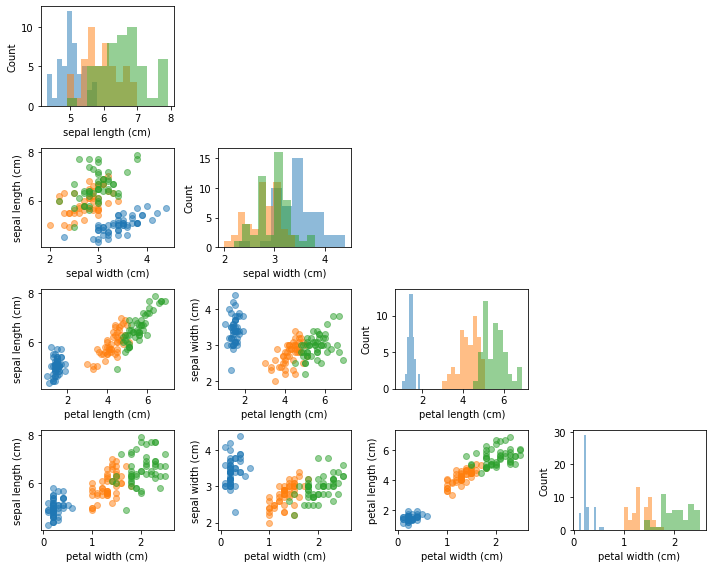

In [6]:
fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=df.columns)

plt.tight_layout()
plt.show()

Looking at the graphic, it's possible to see that there is a high correlation between the petal length with the petal width. Thus,  we will assign only these two features for the matrix, X.

In [7]:
X = iris.data[:, [2, 3]]

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Using the *train_test_split* function from scikit-learn's *model_selection* module, we randomly split the X and Y arrays into 30 percent test data (45 examples) and 70 percent training data (105 examples).

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

For an optimal performance we will standardize the features of the data using the *StandardScaler* class from scikit-learn's *preprocessing* module.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

By executing the following code, we will now implement a KNN model in scikit-learn using a Euclidian distance metric.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

To visualize the decision boundaries for two-dimensional datasets

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None,
 resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',s=100, label='test set')

To specify the indices of the examples that we want to mark on the
resulting plots.

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

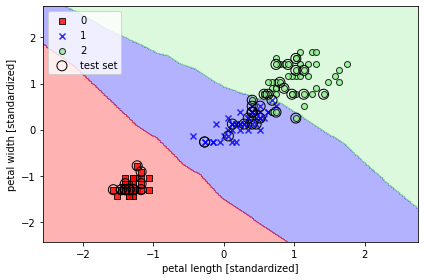

In [15]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Measuring model performance

Now, we need to figure out how to measure the model performance. In classification problems, accuracy is a commonly-used metric. The accuracy of a classifier is defined as the number of correct predictions divided by the total number of data points.

We can compute the accuracy on both data used to fit the classifier and the test set but, for the data used to fit the classifier, the perfomance will not be indicative of how well it can generalize to unseen data.

In [16]:
y_pred = knn.predict(X_test_std)
acc_train=knn.score(X_train_std,y_train).round(2)
acc_test=knn.score(X_test_std, y_test).round(2)
print("The accuracy for the train data is {} and for the test data is {}.".format(acc_train,acc_test))

The accuracy for the train data is 0.98 and for the test data is 0.91.


To know *k* boundary to our date we can plot a model complexity curve, that can indicate us the best perfomance on the test.

In [17]:
def plot_graph(X_train,X_test,y_train,y_test):
    # Setup arrays to store train and test accuracies
    neighbors = np.arange(1, 9)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    for i,k in enumerate(neighbors):
        # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fit the classifier to the training data
        knn.fit(X_train,y_train)

        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train_std, y_train)

        #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test_std, y_test)

    # Generate plot
    plt.title('k-NN: Varying Number of Neighbors')
    plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

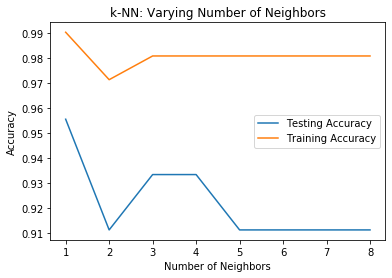

In [18]:
plot_graph(X_train_std,X_test_std,y_train,y_test)

### Fine-Tuning

We evaluated the performance of the k-NN classifier based on its accuracy. However, accuracy is not always an informative metric and, several other performance metrics can be used to measure a model's relevance, such as precision, recall, and the **F1 score**. 

We will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report. A confusion matrix is simply a square matrix that reports the counts of the **true positive (TP)**, **true negative (TN)**, **false positive (FP)**, and **false negative (FN)** predictions of a classifier.

The classification report consists of three rows and an additional support column.The support gives the number of samples of the true response that lie in that class. The precision, recall, and f1-score columns gave the respective metrics for that particular class.

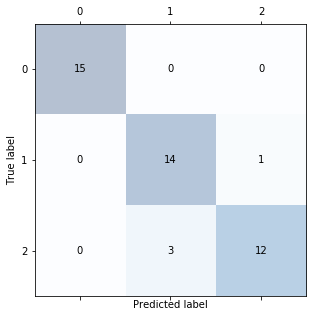

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [30]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train_std, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test_std)

#Plot the confusion matrix
confmat = confusion_matrix(y_test, y_pred)

def conf_plot(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
conf_plot(confmat)

# Classification report
print(classification_report(y_test, y_pred))

By the graph, we can see that the model correctly classified all examples that belong to class 0 (Iris-Setosa) and made incorrect classification for three cases that belong to class 1 (Iris-Versicolour) and one wrong classification that belongs to class 2 (Iris-Virginica).

## 2. Regression

A second type of supervised learning is the prediction of **continuous** outcomes, which is also called regression analysis. In regression analysis, we are given a number of predictor (**explanatory**) variables and a continuous response variable (**outcome**), and we try to find a relationship between those variables that allows us to predict an outcome. 

### Linear Regression

The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable.

In a simple (**univariate**) linear regression the goal is to model the relationship between a single feature (**explanatory variable**, *x*) and a continuous-valued **target** (**response variable**,*y*). The equation of a linear model with one explanatory variable is defined as follows:

\begin{equation}
    y = \beta_{0} + \beta_{1}x_{1} + \epsilon
\end{equation}

where,

- $x_{1}$ = explanatory variable
- y = response variable
- $\beta_{0}$ = *y* axis intercept
- $\beta_{1}$ = associated parameter
- $\epsilon$ = residual

Based on this equation, linear regression can be understood as fiding the best-fitting straight line (i.e., $\beta_{0}$ and $\beta_{1}$ values) throught the training examples.

### Multiple linear regression

Of course, we can also generalize the linear regression model to **multiple explanatory variables**; this process is called **multiple linear regression**:

\begin{equation}
    y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{p}x_{p} + \epsilon
\end{equation}

where,

- $x_{1}$...$x_{p}$ = explanatory variables
- y = response variable
- $\beta_{0}$ = *y* axis intercept
- $\beta_{1}$...$\beta_{p}$ = associated parameters
- $\epsilon$ = residual erros

### Exploratory Data Analysis - The Housing dataset

In [17]:
boston = datasets.load_boston()
print(boston['DESCR'][21:-1078])

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by 

To confirm that the dataset was loaded successfully, we can display the first five lines of the dataset (as a pandas dataframe)

In [18]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df = pd.concat([df,pd.DataFrame({'MEDV':boston.target})],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


First, we will create a scatterplot matrix that allows us to visualize the pair-wise correlations between the different features in this dataset in one place, providing us a useful graphical summary of the relationships in a dataset.

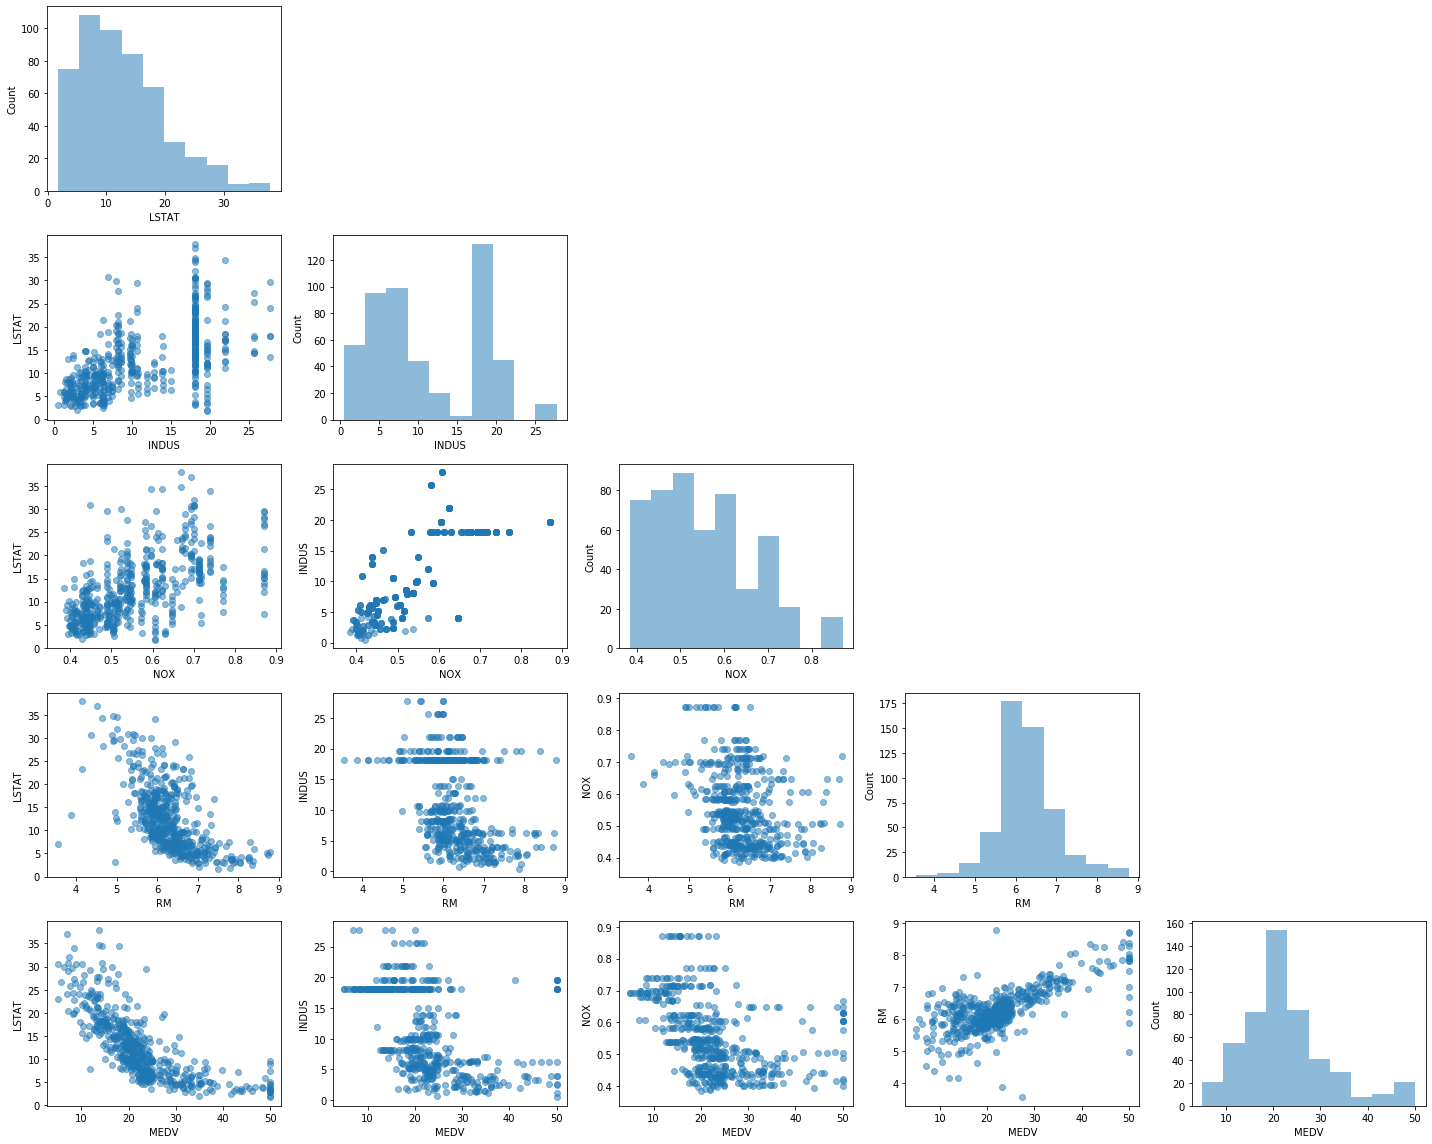

In [19]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values,figsize=(20, 16),names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

We can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between RM and house prices, MEDV (the fifth column of the fourth row). Furthermore, we can see in the histogram—the lower-right subplot in the scatterplot matrix—that the MEDV variable seems to be normally distributed but contains several outliers.

Now, we can look at the relationships using a correlation matrix, which is a square matrix that contains the **Pearson product-moment** correlation coefficient (often abbreviated as **Pearson's r**), which measures the linear dependence between pairs of features. 
The correlation coefficients are in the range –1 to 1. Two features have a perfect positive correlation if r = 1,
no correlation if r = 0, and a perfect negative correlation if r = –1. 

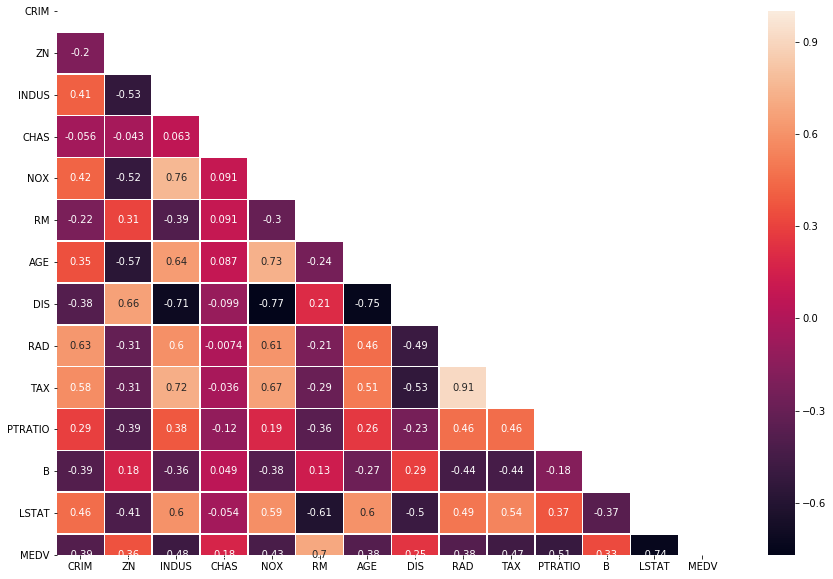

In [20]:
_ = plt.figure(figsize=(15,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, mask=matrix,linewidths=.5)
plt.show()

For the linear regression implementation in scikit-learn it is better to use unstandardized variables, since it does not use (S)GD-based optimization, so we can skip the standardization step.

Based on the previous equations it was defined that the linear regression can be understood as obtaining the **best-fitting straight line** through the training data. The best-fitting straight line is the line that minimizes the residual errors ($\epsilon$).

In the following we will use the ordinary least squares (**OLS**) method (sometimes also called linear least squares) to estimate the parameters of the linear regression line that minimizes the sum of the squared vertical distances (residuals or errors) to the training examples.

Slope: 9.102
Intercept: -34.671


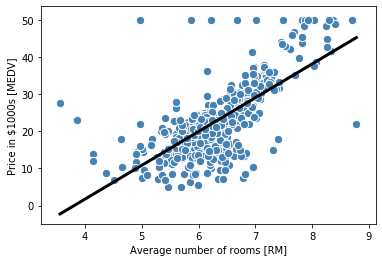

In [21]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
X = df[['RM']].values
y = df['MEDV'].values

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Print Slope and Intercept values
print('Slope: %.3f' % reg.coef_[0])
print('Intercept: %.3f' % reg.intercept_)

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Evaluating the performance of linear regression models

It is crucial to test the model on data that it hasn't seen during training to obtain a more unbiased estimate of its
generalization performance. On this way, we will split the dataset into separate training and test datasets, will be used the former to fit the model and the latter to evaluate its performance on unseen data to estimate the generalization performance. 

Here, we will proceed using all variables in the dataset (i.e., **multiple linear regression**)

In [22]:
# Import necessary modules
from sklearn.metrics import mean_squared_error

X = df.iloc[:, :-1].values
y = df['MEDV'].values

#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test and the train data: y_test_pred, y_train_pred
y_train_pred = reg_all.predict(X_train)
y_test_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test).round(2)))
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred)).round(2)
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.71
Root Mean Squared Error: 4.64


Since our model uses multiple explanatory variables, we can't visualize the linear regression line (or hyperplane, to be precise) in a two-dimensional plot, but we can plot the residuals (the differences or vertical distances between the actual and
predicted values) versus the predicted values to diagnose our regression model.

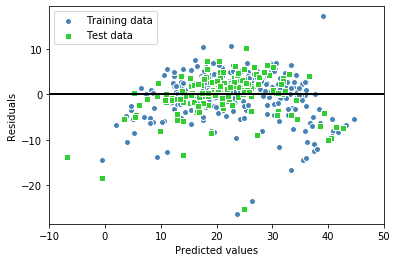

In [23]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='steelblue',
            marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='limegreen',
            marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

For a good regression model, we would expect the errors to be randomly distributed and the residuals to be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory
information, which has leaked into the residuals, as you can slightly see in our previous residual plot. 

### Cross-Validation

If you are computing the RMSE on your test, the RMSE returned is dependent on the way that you split up the data. The data points in the test set may have some peculiarities that mean the RMSE computed on it is not representative of the model's ability to generalize to unseen data.
To combat this dependence on what is essenciatially an abitrary split, we use a technique called **k-fold cross-validation**.

In k-fold cross-validation, we randomly split the training dataset into k folds without replacement, where k – 1 folds are used for the model training, and one fold is used for performance evaluation. This procedure is repeated k times so that we obtain k
models and performance estimates.

Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that each example will be used for training and validation (as part of a test fold) exactly once, which yields a lower-variance estimate of the model performance than the holdout method.

Read more and different applications in [Scikit-Learn Cross-Validation User's Guide](https://scikit-learn.org/stable/modules/cross_validation.html)

In [49]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

X = df[['RM']].values
y = df['MEDV'].values

# Create the regressor: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(2)))

[ 0.70708692  0.63476138  0.50385441 -0.21594318 -1.77736913]
Average 5-Fold CV Score: -0.03


### Regularized Regression

Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can
be caused by having too many parameters, leading to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.

The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter (weight) values.  The most popular approaches to regularized linear regression are the so-called **Ridge Regression, least absolute shrinkage and
selection operator (LASSO)**.

**Ridge Regression** is an L2 penalized model where we simply add the squared sum of the weights to our least-squares cost function:

\begin{equation}
    Loss function = OLS loss function + \alpha * \sum_{i=1}^{n}a_{i}
\end{equation}

**LASSO** performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. Here, the penalty for **LASSO** is defined as the sum of the absolute magnitudes of he model weights, as follows:

\begin{equation}
    Loss function = OLS loss function + \alpha * \sum_{i=1}^{n}\left |a_{i} \right |
\end{equation}

where,
- $\alpha$ = Parameter we need to choose that controls model complexity ($\alpha$ = 0: We get back OLS, which can lead to overt - very high $\alpha$: Can lead to undertting)

An important advantage of LASSO is that it can be used to select important features of a dataset once it shrinks the coefcients ofless important features to exactly 0.

In both cases picking alpha is similar to picking k in k-NN.

In [60]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

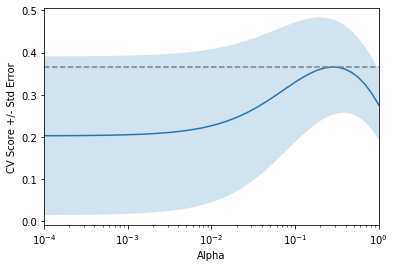

The alpha with the max CV score is 0.27


In [74]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#Defining the plot function
def display_plot(alpha_space,cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
    

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha   
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(alpha_space,ridge_scores, ridge_scores_std)

# Print the alpha with the max CV score
index = ridge_scores.index(np.max(ridge_scores))
print('The alpha with the max CV score is {}'.format(round(alpha_space[index],2)))

Using LASSO to select the most important features of a dataset.

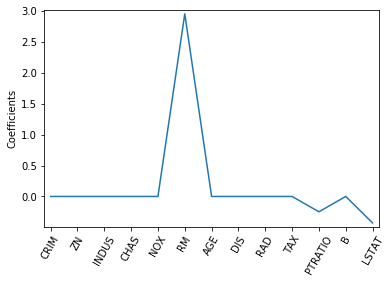

In [84]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute the coefficients
lasso_coef = lasso.fit(X, y).coef_

# Plot the coefficients as a function of feature name
plt.plot(range(len(df.iloc[:, :-1].columns)), lasso_coef)
plt.xticks(range(len(df.iloc[:, :-1].columns)), df.iloc[:, :-1].columns.values, rotation=60)
_ = plt.ylabel('Coefficients')
plt.margins(0.02)
plt.show()

Now, we can see directly that the most important predictor for our target variable, housing price, is number of rooms!